In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [6]:
df=pd.read_csv("Project_Dataset.csv")

# Data preprocessing

In [7]:
df.sample(11)

,Year,Rainfall_density(mm),Ground_Level,Avg_humidity,Avg_Temp.,Extra_resources
107,2021,1257.0,Yes,56,25,Yes
68,2022,1257.0,Yes,69,30,Yes
54,2022,1257.0,Yes,69,30,Yes
17,2023,760.9,Yes,57,28,Yes
122,2021,1257.0,Yes,56,25,Yes
83,2022,1257.0,Yes,69,30,No
74,2022,1257.0,No,69,30,Yes
123,2021,1257.0,No,56,25,No
133,2021,1257.0,No,56,25,No
61,2022,1257.0,No,69,30,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  148 non-null    int64  
 1   Rainfall_density(mm)  148 non-null    float64
 2   Ground_Level          148 non-null    object 
 3   Avg_humidity          148 non-null    int64  
 4   Avg_Temp.             148 non-null    int64  
 5   Extra_resources       148 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 7.1+ KB


In [9]:
df.describe()

,Year,Rainfall_density(mm),Avg_humidity,Avg_Temp.
count,148.000000,148.000000,148.000000,148.000000
mean,2022.000000,1089.398649,60.554054,27.635135
std,0.824786,235.438641,5.885857,2.057502
min,2021.000000,760.900000,56.000000,25.000000
25%,2021.000000,760.900000,56.000000,25.000000
50%,2022.000000,1257.000000,57.000000,28.000000
75%,2023.000000,1257.000000,69.000000,30.000000
max,2023.000000,1257.000000,69.000000,30.000000


In [10]:
df.shape

(148, 6)

# Encoding

In [11]:
from sklearn import preprocessing 

In [12]:
my_label = preprocessing.LabelEncoder()   
df['Ground_Level']= my_label.fit_transform(df['Ground_Level'])   
print(df['Ground_Level' ].unique())  

[0 1]


In [13]:
df['Extra_resources']= my_label.fit_transform(df['Extra_resources'])   
print(df['Extra_resources'].unique())

[1 0]


In [14]:
df

,Year,Rainfall_density(mm),Ground_Level,Avg_humidity,Avg_Temp.,Extra_resources
0,2023,760.9,0,57,28,1
1,2023,760.9,1,57,28,1
2,2023,760.9,0,57,28,1
3,2023,760.9,0,57,28,0
4,2023,760.9,0,57,28,1
...,...,...,...,...,...,...
143,2021,1257.0,0,56,25,1
144,2021,1257.0,0,56,25,0
145,2021,1257.0,0,56,25,1
146,2021,1257.0,0,56,25,0


In [15]:
x = df.drop(columns=['Extra_resources'])
y = df['Extra_resources']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.20,train_size=0.80, random_state=42)

In [17]:
X_train

,Year,Rainfall_density(mm),Ground_Level,Avg_humidity,Avg_Temp.
136,2021,1257.0,0,56,25
45,2023,760.9,1,57,28
119,2021,1257.0,0,56,25
27,2023,760.9,1,57,28
4,2023,760.9,0,57,28
...,...,...,...,...,...
71,2022,1257.0,1,69,30
106,2021,1257.0,1,56,25
14,2023,760.9,1,57,28
92,2022,1257.0,1,69,30


In [18]:
y_train

136    1
45     1
119    0
27     1
4      1
      ..
71     1
106    1
14     1
92     1
102    0
Name: Extra_resources, Length: 118, dtype: int32

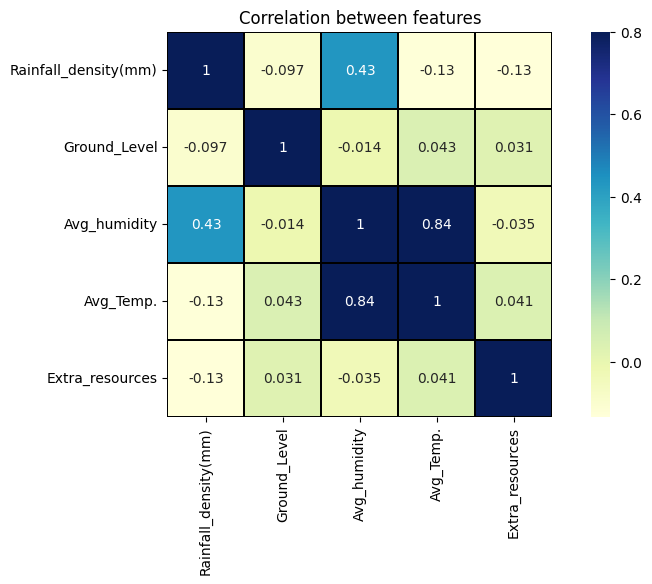

In [19]:
# Calculate the correlation matrix
corr = df.drop(columns=['Year']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu', linecolor="black")
plt.title('Correlation between features')
plt.show()

In [20]:
# Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [22]:
lr.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(X_train)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
cm = metrics.confusion_matrix(y_train,lr.predict(X_train))
cm

array([[ 0, 34],
       [ 0, 84]], dtype=int64)

In [25]:
cm = metrics.confusion_matrix(y_train,lr.predict(X_train))
cm

array([[ 0, 34],
       [ 0, 84]], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
y_pred= lr.predict(X_train)
accuracy= accuracy_score(y_train,y_pred)
print("Accuracy of training dataset:",accuracy*100)

Accuracy of training dataset: 71.1864406779661


In [27]:
from sklearn.metrics import precision_score, recall_score

In [28]:
precision=precision_score(y_train,y_pred)
print("Precision_Score :", precision*100)

Precision_Score : 71.1864406779661


# SVM Model

In [29]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [30]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.7333333333333333 

[[ 0  8]
 [ 0 22]]


In [32]:
#linear
model_linear = SVC(kernel='linear')

In [33]:
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
y_pred = model_linear.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.7333333333333333 

[[ 0  8]
 [ 0 22]]


# linear Regression Model

In [36]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [37]:
LR.fit(X_train,y_train)

LinearRegression()

In [38]:
LR.score(X_train,y_train)

0.02181297252239567

In [39]:
predict  = LR.predict(X_test)
predict

array([0.65985931, 0.62802837, 0.72291053, 0.82720576, 0.65985931,
       0.76415453, 0.62802837, 0.82720576, 0.69107959, 0.82720576,
       0.82720576, 0.62802837, 0.65985931, 0.62802837, 0.65985931,
       0.62802837, 0.76415453, 0.69107959, 0.72291053, 0.76415453,
       0.82720576, 0.72291053, 0.82720576, 0.72291053, 0.62802837,
       0.82720576, 0.62802837, 0.72291053, 0.69107959, 0.76415453])

In [40]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.7333333333333333 

[[ 0  8]
 [ 0 22]]


# plot accuracy of different Algorithms

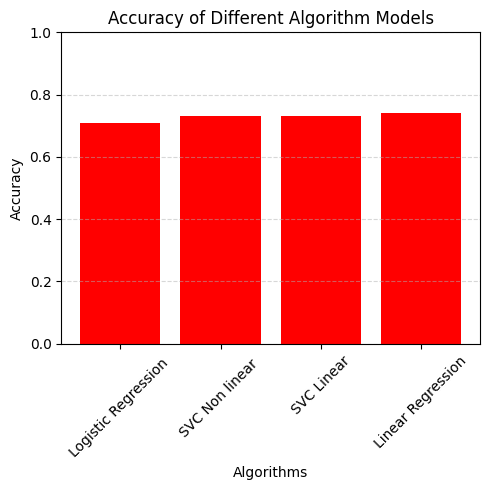

In [41]:
accuracies = [0.71, 0.73, 0.73, 0.74]
algorithms = ['Logistic Regression ', 'SVC Non linear ', 'SVC Linear', 'Linear Regression']

plt.figure(figsize=(5, 5))
plt.bar(algorithms, accuracies, color='Red')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithm Models')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()